In [3]:
!wget -nd -r -l 10 -e robots=off -A .txt www.physionet.org/pn3/gaitpdb/

--2018-12-07 03:14:51--  http://www.physionet.org/pn3/gaitpdb/
Resolving www.physionet.org (www.physionet.org)... 128.30.30.88
Connecting to www.physionet.org (www.physionet.org)|128.30.30.88|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html.tmp’

index.html.tmp          [ <=>                ]  62.02K  --.-KB/s    in 0.1s    

2018-12-07 03:14:51 (564 KB/s) - ‘index.html.tmp’ saved [63507]

Removing index.html.tmp since it should be rejected.

--2018-12-07 03:14:51--  http://www.physionet.org/news.shtml
Reusing existing connection to www.physionet.org:80.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘news.shtml.tmp’

news.shtml.tmp          [ <=>                ]  55.75K  --.-KB/s    in 0.07s   

2018-12-07 03:14:51 (786 KB/s) - ‘news.shtml.tmp’ saved [57086]

Removing news.shtml.tmp since it should be rejected.

--2018-12-07 03:14:51--  http://www.physionet.org/in-the-new

In [0]:
!rm -r *


In [4]:
!ls

demographics.txt  GaPt16_02.txt  JuCo11_01.txt	JuPt14_01.txt  SiCo06_01.txt
format.txt	  GaPt16_10.txt  JuCo12_01.txt	JuPt15_01.txt  SiCo07_01.txt
GaCo01_01.txt	  GaPt17_01.txt  JuCo13_01.txt	JuPt15_02.txt  SiCo08_01.txt
GaCo02_01.txt	  GaPt17_02.txt  JuCo14_01.txt	JuPt15_03.txt  SiCo09_01.txt
GaCo02_02.txt	  GaPt17_10.txt  JuCo15_01.txt	JuPt15_04.txt  SiCo10_01.txt
GaCo03_01.txt	  GaPt18_01.txt  JuCo16_01.txt	JuPt15_05.txt  SiCo11_01.txt
GaCo03_02.txt	  GaPt18_02.txt  JuCo17_01.txt	JuPt15_06.txt  SiCo12_01.txt
GaCo04_01.txt	  GaPt18_10.txt  JuCo18_01.txt	JuPt15_07.txt  SiCo13_01.txt
GaCo04_02.txt	  GaPt19_01.txt  JuCo19_01.txt	JuPt16_01.txt  SiCo14_01.txt
GaCo05_01.txt	  GaPt19_02.txt  JuCo20_01.txt	JuPt17_01.txt  SiCo15_01.txt
GaCo05_02.txt	  GaPt19_10.txt  JuCo21_01.txt	JuPt18_01.txt  SiCo16_01.txt
GaCo06_01.txt	  GaPt20_01.txt  JuCo22_01.txt	JuPt19_01.txt  SiCo17_01.txt
GaCo06_02.txt	  GaPt20_02.txt  JuCo23_01.txt	JuPt20_01.txt  SiCo18_01.txt
GaCo07_01.txt	  GaPt20_10.txt  JuCo24_0

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedShuffleSplit

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Flatten, TimeDistributed
from keras.layers import Conv2D, MaxPooling2D
import keras

from keras.utils.training_utils import multi_gpu_model
from keras import utils as np_utils

from random import shuffle
from tensorflow.python.client import device_lib

import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [0]:
# For wider plots
plt.rcParams["figure.figsize"] = (20,6)

# Take my NVidia GPU into use
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2"

In [7]:
!ls

demographics.txt  GaPt16_02.txt  JuCo11_01.txt	JuPt14_01.txt  SiCo06_01.txt
format.txt	  GaPt16_10.txt  JuCo12_01.txt	JuPt15_01.txt  SiCo07_01.txt
GaCo01_01.txt	  GaPt17_01.txt  JuCo13_01.txt	JuPt15_02.txt  SiCo08_01.txt
GaCo02_01.txt	  GaPt17_02.txt  JuCo14_01.txt	JuPt15_03.txt  SiCo09_01.txt
GaCo02_02.txt	  GaPt17_10.txt  JuCo15_01.txt	JuPt15_04.txt  SiCo10_01.txt
GaCo03_01.txt	  GaPt18_01.txt  JuCo16_01.txt	JuPt15_05.txt  SiCo11_01.txt
GaCo03_02.txt	  GaPt18_02.txt  JuCo17_01.txt	JuPt15_06.txt  SiCo12_01.txt
GaCo04_01.txt	  GaPt18_10.txt  JuCo18_01.txt	JuPt15_07.txt  SiCo13_01.txt
GaCo04_02.txt	  GaPt19_01.txt  JuCo19_01.txt	JuPt16_01.txt  SiCo14_01.txt
GaCo05_01.txt	  GaPt19_02.txt  JuCo20_01.txt	JuPt17_01.txt  SiCo15_01.txt
GaCo05_02.txt	  GaPt19_10.txt  JuCo21_01.txt	JuPt18_01.txt  SiCo16_01.txt
GaCo06_01.txt	  GaPt20_01.txt  JuCo22_01.txt	JuPt19_01.txt  SiCo17_01.txt
GaCo06_02.txt	  GaPt20_02.txt  JuCo23_01.txt	JuPt20_01.txt  SiCo18_01.txt
GaCo07_01.txt	  GaPt20_10.txt  JuCo24_0

In [0]:
from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Convolution2D, UpSampling2D
from keras.layers.normalization import BatchNormalization
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K
from keras import initializers
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

In [9]:
!rm talk-instructions.txt
!rm LICENSE.txt
!rm demographics.txt
!rm format.txt
!rm package-list.txt
!rm example-search.txt
!rm index.html.tmp

rm: cannot remove 'talk-instructions.txt': No such file or directory
rm: cannot remove 'LICENSE.txt': No such file or directory
rm: cannot remove 'package-list.txt': No such file or directory
rm: cannot remove 'example-search.txt': No such file or directory
rm: cannot remove 'index.html.tmp': No such file or directory


In [0]:
files = glob.glob("./*_??.txt")

In [11]:
len(files)

306

In [0]:
shuffle(files)

In [0]:
def classFrame(f):
    if (f.find("Co") >=0):
        return 0
    else:
        return 1

In [0]:
df = pd.DataFrame(files)

In [15]:
df

,0
0,./SiPt14_01.txt
1,./SiCo25_01.txt
2,./SiPt23_01.txt
3,./SiPt17_01.txt
4,./SiCo30_01.txt
5,./SiCo26_01.txt
6,./GaCo16_10.txt
7,./GaPt20_02.txt
8,./GaCo15_02.txt
9,./SiPt09_01.txt


In [16]:
df.head()

,0
0,./SiPt14_01.txt
1,./SiCo25_01.txt
2,./SiPt23_01.txt
3,./SiPt17_01.txt
4,./SiCo30_01.txt


In [0]:
df['classification']  = df[0].map(lambda x: classFrame(x))

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1917)


In [0]:
for i, j in split.split(df, df['classification']):
    train = df.loc[i]
    test  = df.loc[j]
    
train = train[0].values
test = test[0].values

In [19]:
train[3]

'./GaCo10_02.txt'

In [20]:
len(train), len(test)

(244, 62)

In [0]:
def encoder(label, len):
    arr = np.zeros([len, 2])

    if (label == 0):
        arr[:, 0] = 1
    else:
        arr[:, 1] = 1
    return arr

In [22]:
sc = StandardScaler()

def initScalerWith():
    d = pd.DataFrame()
    
    for f in train:
        data = pd.read_csv(f, sep='\t')
        data['classification'] = classFrame(f)
        d = pd.concat([data], axis=1)
    return d.values

sc.fit(initScalerWith())

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
def readSensorDataFromFile(f):
    d = pd.read_csv(f, sep='\t')
    d['classification'] = classFrame(f)
    return sc.transform(d.values)

In [0]:
def produceImagesFromFile(file, image_height, offset=100):
    r = pd.DataFrame()
    print("file is ",file)
    # Width is 16 pixels
    d = readSensorDataFromFile(file)[:, 1:17]
    print("shape of file is" ,d.shape)
    for i in range(0, d.shape[0], offset):
        if (i+image_height > d.shape[0]):
            print("exceed by ",i+image_height)
            continue
        r = pd.concat([r, pd.DataFrame(d[i:i+image_height])], axis=0)
        print("shape of r is ",r.shape)

    return r.values.reshape(-1, 16, image_height, 1), classFrame(file)

In [0]:
batch_size = 16
image_height = 192

def generate_arrays_from_file(files):
    while 1:
         for f in files:
            #print("processing ", f)
            x_batch, y_class = produceImagesFromFile(f, image_height=image_height)
            y_batch = encoder(y_class, x_batch.shape[0])
       
            # Batch size defined as "batch_size" in the initialization
            for i in range (0, len(x_batch), batch_size):
                yield (x_batch[i:i+batch_size], y_batch[i:i+batch_size])

In [0]:
def count_steps_in_epoch(files, batch_size = 64, image_height = 192):
    count = 0
    for f in files:
        xb, _ = produceImagesFromFile(f, image_height=image_height)
        print("xb is ",xb.shape)
        count = count + int(xb.shape[0] / batch_size)
    return count

In [70]:
batch_size = 16
image_height = 240

training_set_steps_per_epoch = count_steps_in_epoch(train, batch_size=batch_size, image_height=image_height)
test_set_steps_per_epoch = count_steps_in_epoch(test, batch_size=batch_size, image_height=image_height)

a,b = next(generate_arrays_from_file(test))

print("Training: ", training_set_steps_per_epoch, " samples, testing: ", test_set_steps_per_epoch)

file is  ./SiPt19_01.txt
shape of file is (12118, 16)
shape of r is  (240, 16)
shape of r is  (480, 16)
shape of r is  (720, 16)
shape of r is  (960, 16)
shape of r is  (1200, 16)
shape of r is  (1440, 16)
shape of r is  (1680, 16)
shape of r is  (1920, 16)
shape of r is  (2160, 16)
shape of r is  (2400, 16)
shape of r is  (2640, 16)
shape of r is  (2880, 16)
shape of r is  (3120, 16)
shape of r is  (3360, 16)
shape of r is  (3600, 16)
shape of r is  (3840, 16)
shape of r is  (4080, 16)
shape of r is  (4320, 16)
shape of r is  (4560, 16)
shape of r is  (4800, 16)
shape of r is  (5040, 16)
shape of r is  (5280, 16)
shape of r is  (5520, 16)
shape of r is  (5760, 16)
shape of r is  (6000, 16)
shape of r is  (6240, 16)
shape of r is  (6480, 16)
shape of r is  (6720, 16)
shape of r is  (6960, 16)
shape of r is  (7200, 16)
shape of r is  (7440, 16)
shape of r is  (7680, 16)
shape of r is  (7920, 16)
shape of r is  (8160, 16)
shape of r is  (8400, 16)
shape of r is  (8640, 16)
shape of r is 

KeyboardInterrupt: ignored

In [0]:
training_set_steps_per_epoch

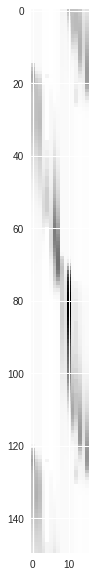

In [0]:
plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(a[6].reshape(image_height, 16)[:150, :])
plt.show()

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=a.shape[1:]))
#kernel_initializer='glorot_uniform',
                 
model.add(Activation('relu'))
model.add(BatchNormalization(name="batch_norm_1"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), padding='same'))          
model.add(Activation('relu'))
          
          
model.add(BatchNormalization(name="batch_norm_2"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

early_stopping = EarlyStopping(monitor='val_acc', patience=60, verbose=1, mode='auto')
checkpoint = ModelCheckpoint("./model/model_parkinsons_v0.h5", 
                             monitor='val_acc', verbose=0, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [0]:
model = model.fit_generator(generate_arrays_from_file(train), 
                    validation_data=generate_arrays_from_file(test),
                    steps_per_epoch=training_set_steps_per_epoch, 
                    validation_steps=test_set_steps_per_epoch,
                    verbose=2,
                    epochs=5, 
                    shuffle=True,
                    use_multiprocessing=True,
                   callbacks=[early_stopping, checkpoint])

Epoch 1/5
 - 50s - loss: 0.6166 - acc: 0.8294 - val_loss: 1.3801 - val_acc: 0.7638
Epoch 2/5
 - 49s - loss: 0.5427 - acc: 0.8602 - val_loss: 2.5425 - val_acc: 0.6711
Epoch 3/5
 - 49s - loss: 0.4615 - acc: 0.8830 - val_loss: 0.6843 - val_acc: 0.7514
Epoch 4/5
 - 50s - loss: 0.3556 - acc: 0.9079 - val_loss: 0.6155 - val_acc: 0.7161
Epoch 5/5
 - 48s - loss: 0.3354 - acc: 0.9139 - val_loss: 1.4429 - val_acc: 0.6551


In [0]:
!mkdir model